## Observations and Insights 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata.head())
#print(study_results.head())

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner" )
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [84]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_df.loc[merged_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [86]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_df.loc[merged_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged_df.loc[merged_df['Mouse ID'] != 'g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [88]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'variance':grp.var(),'standard dev':grp.std(),'SEM':grp.sem()})


,mean,median,variance,standard dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
# This method produces everything in a single groupby function
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

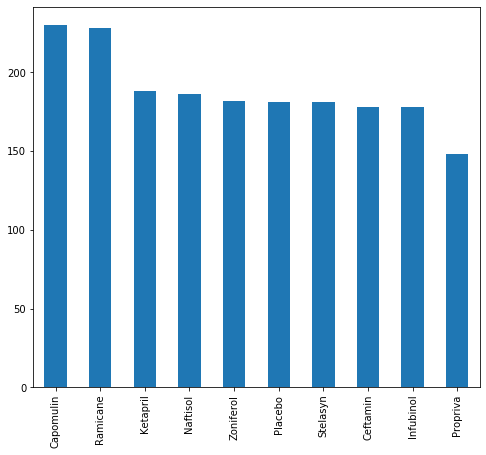

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df = clean['Drug Regimen'].value_counts()
df.plot(kind='bar')

In [92]:
df.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

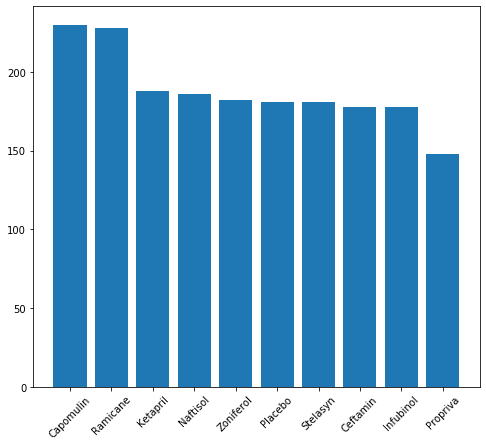

In [93]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(df.index,df)
plt.xticks(rotation=45)


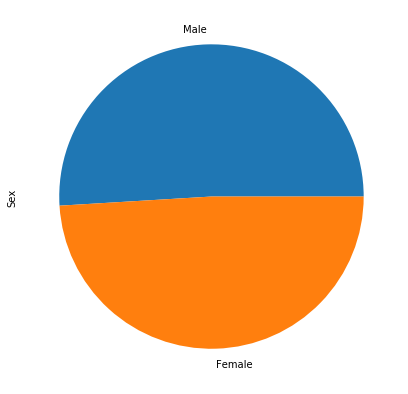

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean.Sex.value_counts()
sex.plot(kind='pie')

In [95]:
df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdf429f66d8>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

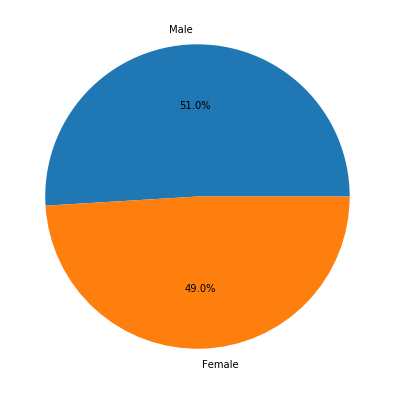

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean.Sex.value_counts(), labels=sex.index,autopct ='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_ls = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
timepoint = clean.groupby('Mouse ID').Timepoint.max()

four_drugs = merged_df[merged_df['Drug Regimen'].isin(drug_ls)]
last_tumor_size = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
last_tumor_size

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [98]:
# Put treatments into a list for for loop (and later for plot labels)
last_tumor_size_unstack = last_tumor_size.stack(level=0).unstack(level=0)
for drug in drug_ls:
    quartiles = last_tumor_size_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    

    
# Create empty list to fill with tumor vol data (for plotting)

empty_ls= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_ls:
    empty_ls.append(list(last_tumor_size_unstack[drug].dropna()))  

    

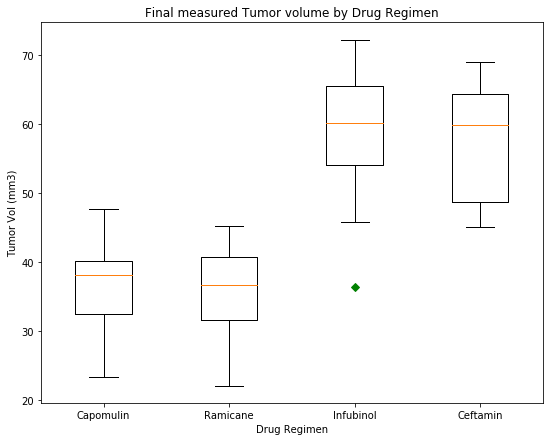

In [99]:
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(empty_ls,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_ls)
plt.show()

## Line and Scatter Plots

In [100]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


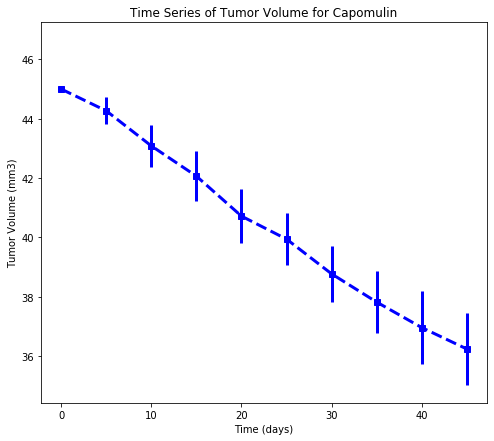

In [101]:
cap_time_tumor = capomulin_df.groupby(['Timepoint']).agg(\
               Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
               Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

time_series = list(cap_time_tumor.index.values)


plt.errorbar(
    time_series,  
    cap_time_tumor['Tumor_Vol_Mean'],
    yerr=cap_time_tumor['Tumor_Vol_SEM'],    
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", 
    linewidth=3 
    )

plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

plt.show()

In [102]:
#capomulin_data.head()
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
                Mouse_weight=('Weight (g)', np.mean),\
                Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


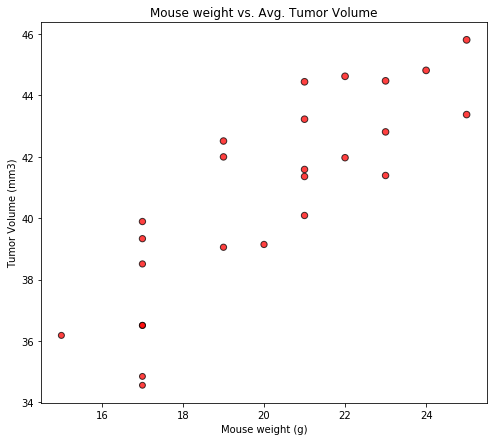

In [103]:

plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


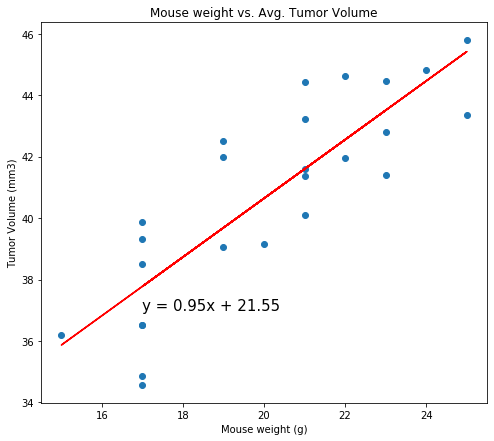

In [106]:
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()